## Gathering

In [1]:
#needed libraries
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1st dataset (enhanced archive)/ source: given
t_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#2nd dataset (image predictions)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url) #request tsv file
#create directory
folder_name=url.split('/')[-1]
if not os.path.exists(folder_name):
    with open(folder_name, mode='wb') as file:
        file.write(r.content)
#load df 
t_images=pd.read_csv(folder_name,sep='\t')

In [4]:
#3rd dataset (twitter query)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [5]:
errors=[]
if not os.path.exists('Twitter_qdata.txt'):
    with open('Twitter_qdata.txt',mode='w') as f: 
        for tweet_id in tweets_id:
            try:
                tweet=api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode='extended')
                json.dump(tweet._json, f)
                f.write('\n')
            except tweepy.TweepError as e:
                errors.append(tweet_id)
                print('error for tweet{}'.format(tweet_id)+' '+str(e))


In [6]:
d_list=[]
with open('Twitter_qdata.txt') as file:
    f=file.read()
    t=f.split('\n')


In [7]:
len(t)

2332

In [8]:
d_list=[]
for i in range(len(t)-1):
        t_dict=json.loads(t[i])
        tweet_id=t_dict['id']
        favourite_count=t_dict['favorite_count']
        retweet_count=t_dict['retweet_count']
        d_list.append({'tweet_id':tweet_id,'favorite_count':favourite_count, 
                       'retweet_count':retweet_count})
        
        
api_df=pd.DataFrame(d_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

# Assessing

### First dataset

#### visual assesment

In [9]:
t_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Idk why this keeps happening. W...,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1524,690597161306841088,NaN,NaN,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None,None,None,None
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,None,None,pupper,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
580,800459316964663297,NaN,NaN,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800459316...,12,10,None,None,None,pupper,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None


#### programmatic assesment

In [10]:
t_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
t_enhanced.shape

(2356, 17)

In [12]:
t_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
t_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
t_enhanced[t_enhanced.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [15]:
t_enhanced[t_enhanced.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [16]:
t_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Toby           7
Daisy          7
Bailey         7
an             7
Rusty          6
Leo            6
Koda           6
Oscar          6
Scout          6
Jack           6
Stanley        6
Dave           6
Milo           6
Jax            6
Bella          6
Louis          5
            ... 
Hermione       1
Berb           1
Zeus           1
Walker         1
Jazz           1
Einstein       1
Lorelei        1
Winifred       1
Sparky         1
Marvin         1
Brian          1
Teddy          1
Blakely        1
Beckham        1
Odin           1
Darrel         1
Thor           1
Mason          1
Trip           1
Bonaparte      1
Fabio          1
Tedrick        1
Georgie        1
Shiloh         1
Rhino          1
Tove           1
Lupe           1
Kloey         

In [17]:
print(t_enhanced['doggo'].value_counts())
print(t_enhanced['floofer'].value_counts())
print(t_enhanced['pupper'].value_counts())
print(t_enhanced['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [18]:
t_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
t_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
t_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
t_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
t_enhanced[(t_enhanced['doggo']!='None') & (t_enhanced['floofer']!='None')].index

Int64Index([200], dtype='int64')

In [23]:
t_enhanced[(t_enhanced['doggo']!='None')&(t_enhanced['pupper']!='None')].index

Int64Index([460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113], dtype='int64')

In [24]:
t_enhanced[(t_enhanced['doggo']!='None')&(t_enhanced['puppo']!='None')].index

Int64Index([191], dtype='int64')

In [25]:
t_enhanced[(t_enhanced['pupper']!='None')&(t_enhanced['puppo']!='None')].index

Int64Index([], dtype='int64')

### Observations: 
- **Completeness**:
- Missing values (doggo,floofer, pupper, ,puppo and name)
- **Validity**: Some values are retweets which doesn't fit our schema
- **Accuracy**: 
- Stage data is not accurate (Can't be 2 values simultanieously):
- *Examples*:
- floofer+doggo row 200
- doggo+pupper (460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113)
- doggo+puppo 191
----------------------------------------------------
- name and denomenator value at index 1120 are inacurate
- neumerator value at 979 is noticibly high
- name column inacurrate names
- **Data types quality**:
- changing stage column dtype=categorical
- 'none' strings in (doggo,floofer, pupper, ,puppo) instead of NA
- time stamp str not date time
- name column 'None' instead of NA
- (in_reply_to_status_id , in_reply_to_user_id,retweeted_status_id ,
                retweeted_status_user_id, retweeted_status_timestamp) are irrelevant to the analysis
- **Tidiness**: 
- Messy columns (doggo,floofer, pupper, ,puppo), only one 'Stage' column needed



### Second dataset

#### Visual assesment

In [26]:
t_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1867,843856843873095681,https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg,1,Labrador_retriever,0.922540,True,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
938,703631701117943808,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False
1740,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True


#### programmatic assesment

In [27]:
t_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [28]:
t_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
t_images.shape

(2075, 12)

In [30]:
t_images.tweet_id.isin(t_enhanced.tweet_id).value_counts()

True    2075
Name: tweet_id, dtype: int64

## Observations
- Inconsistent number of ids with enhanced dataframe
- inaccurate values in p1,p2,p3
- Not all columns are neccessary for final analysis
- column headers are values not names (p1 dogs, p2 dog, p3 dogs)

### Third dataset

#### Visual assesment

In [31]:
api_df.sample(10)

,tweet_id,favorite_count,retweet_count
2322,666057090499244032,264,118
1755,677700003327029250,3241,1369
1370,700002074055016451,3197,1290
442,817908911860748288,4791,785
725,780459368902959104,5210,1056
2001,671879137494245376,1317,612
2014,671547767500775424,1260,544
1784,676864501615042560,1989,667
99,872620804844003328,19079,3238
424,819924195358416896,12750,4798


#### programatic assesment

In [32]:
api_df.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [33]:
api_df.shape

(2331, 3)

In [34]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [35]:
api_df.tweet_id.isin(t_enhanced.tweet_id).value_counts()

True    2331
Name: tweet_id, dtype: int64

### Observations:

- Inconsistent number of tweets (ids), less than that in enhanced df.

- **General observation**: 
- *Tidiness*:
- data about id is distributed over many tables, we only need one master table.


## Cleaning

First, We tackle the biggest problem, which is inconsistent ids, or inconsistent tweets in the three dataframes.

### Copy

In [36]:
t_enhanced_clean=t_enhanced.copy()
t_images_clean=t_images.copy()
api_df_clean=api_df.copy()

### define:
We need to remove retweets, replys and tweets without images since this doesn't fit our schema. This will be done by filtering the rows that were lost in api, then tweets without images in archive df, then the retweets and replys in the main (enhanced) data_frame, and then using the results to remove the inconsistencies in image and api dataframes

#### Code

In [37]:
#accounting for lost data in api gathering
missing=t_images_clean['tweet_id'].isin(api_df_clean['tweet_id'])
t_images_clean=t_images_clean[missing]
#only tweets with images
missing_enhanced=t_enhanced_clean['tweet_id'].isin(t_images_clean['tweet_id'])

In [38]:
t_enhanced_clean=t_enhanced_clean[missing_enhanced]

In [39]:
#Finding retweets and replys
retweet=t_enhanced_clean[t_enhanced_clean['retweeted_status_id'].notnull()]
replys=t_enhanced_clean[(t_enhanced_clean['in_reply_to_status_id'].notnull())]

In [40]:
#dropping retweets and replys
t_enhanced_clean=t_enhanced_clean.drop(retweet.index)
t_enhanced_clean=t_enhanced_clean.drop(replys.index)

In [41]:
missing_list=t_images_clean['tweet_id'].isin(t_enhanced_clean['tweet_id'])
t_images_clean=t_images_clean[missing_list]
api_missing=api_df_clean['tweet_id'].isin(t_enhanced_clean.tweet_id)
api_df_clean=api_df_clean[api_missing]

#### Test

In [42]:
t_enhanced.shape

(2356, 17)

In [43]:
t_enhanced_clean.shape

(1964, 17)

In [44]:
t_images.shape

(2075, 12)

In [45]:
t_images_clean.shape

(1964, 12)

In [46]:
api_df.shape

(2331, 3)

In [47]:
api_df_clean.shape

(1964, 3)

### Define: 

we need to Drop the unnecessary columns in enhanced (df in_reply_to_status_id , in_reply_to_user_id,retweeted_status_id ,
                retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
                expanded_urls has redundant info (tweet_id) and it's irrelavent to current analysis

In [48]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
dtypes: float64(4), int64(3), object(10)

In [49]:
t_enhanced_clean=t_enhanced_clean.drop(columns=['in_reply_to_status_id' , 'in_reply_to_user_id','retweeted_status_id' ,
                'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1)

### Test

In [50]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dtypes: int64(3), object(8)
memory usage: 184.1+ KB


In [51]:
t_enhanced_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

### Define:
We now consider the timestamp datatype, and change it to datetime

#### Code

In [52]:
t_enhanced_clean.timestamp= pd.to_datetime(t_enhanced_clean.timestamp)

#### Test

In [53]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 184.1+ KB


### Define:
Now we tackle the problems in (doggo,floofer, pupper, ,puppo and name) columns: 
-merging the last 3 columns in 1 stage column
-changing the dtypes of Null values from string to na in names and stage columns


#### Code

In [54]:
t_enhanced_clean=t_enhanced_clean.replace('None','')

In [55]:
new_column=t_enhanced_clean.doggo+t_enhanced_clean.floofer+t_enhanced_clean.pupper+t_enhanced_clean.puppo

In [56]:
t_enhanced_clean=t_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [57]:
t_enhanced_clean['stage']=new_column

In [58]:
t_enhanced_clean=t_enhanced_clean.replace('',np.NAN)

In [59]:
t_enhanced_clean=t_enhanced_clean.replace('doggopupper', 'doggo/pupper')
t_enhanced_clean=t_enhanced_clean.replace('doggofloofer', 'doggo/floofer')
t_enhanced_clean=t_enhanced_clean.replace('doggopuppo', 'doggo/puppo')

#### Test

In [60]:
t_enhanced_clean.stage.value_counts()

pupper           201
doggo             62
puppo             22
doggo/pupper       8
floofer            7
doggo/floofer      1
doggo/puppo        1
Name: stage, dtype: int64

In [61]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1440 non-null object
stage                 302 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 138.1+ KB


We can see the change in values, and the missing values problem is more clear than in the assessment in both names and stage

### Define
Drop irrelavent columns in t_images for my particular analysis. I'm aware that these columns aren't exactly 'dirty', and that very interisting analysies can be done on them, but for my current purposes, they aren't relavent


In [62]:
t_images_clean.columns[6:]

Index(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

In [63]:
t_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [64]:
df=t_images_clean.drop(columns=t_images.columns[6:], index=1 )

In [65]:
df=df.drop(columns=['p1_conf'],axis=1)

In [66]:
master_df=df.merge(api_df_clean, on='tweet_id', how='left' )

In [67]:
master_df=master_df.merge(t_enhanced_clean, on='tweet_id', how='left')

In [68]:
master_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_dog,favorite_count,retweet_count,timestamp,source,text,rating_numerator,rating_denominator,name,stage
496,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,bull_mastiff,True,1246,415,2015-12-13 17:21:08,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hello I'ma just snag this here toasted ba...",9,10,NaN,NaN
1366,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,True,4030,1169,2016-08-25 00:43:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. His sweater is too small and he a...,10,10,Lou,NaN
1923,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,True,41835,8691,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,5,10,Bella,NaN
848,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,True,3312,1353,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,44,40,NaN,NaN
1042,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,True,2943,661,2016-03-31 00:58:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's a world renowned snowball ...,10,10,Oscar,NaN


In [69]:
master_df.describe()

,tweet_id,img_num,favorite_count,retweet_count,rating_numerator,rating_denominator
count,1.963000e+03,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000
mean,7.358510e+17,1.202241,8095.192053,2386.314315,12.225675,10.479368
std,6.744068e+16,0.559739,11903.250125,4263.360145,41.718616,6.867165
min,6.660209e+17,1.000000,69.000000,11.000000,0.000000,2.000000
25%,6.758494e+17,1.000000,1740.000000,533.000000,10.000000,10.000000
50%,7.087381e+17,1.000000,3652.000000,1156.000000,11.000000,10.000000
75%,7.877641e+17,1.000000,10095.000000,2722.000000,12.000000,10.000000
max,8.924206e+17,4.000000,151432.000000,74961.000000,1776.000000,170.000000


In [70]:
master_df.rename({'p1':'dog_breed'},inplace=True,axis=1)

In [71]:
total_ndogs=master_df.query('p1_dog==True').dog_breed.count()

Finding the most common dog breed

In [72]:
counts=master_df.query('p1_dog==True').dog_breed.value_counts()

In [73]:
counts[counts==max(counts)]

golden_retriever    137
Name: dog_breed, dtype: int64

In [74]:
counts.mean()

13.108108108108109

Text(0,0.5,'Number of occurances')

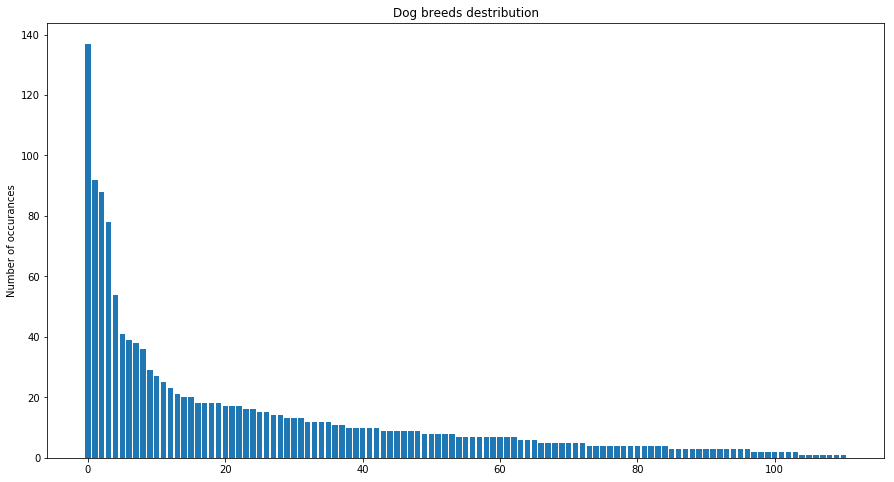

In [75]:
locations=list(range(0,len(counts)))
heights=counts
labels=counts.index
plt.figure(figsize=(15,8))
plt.bar(locations, heights)
plt.title('Dog breeds destribution')
plt.ylabel('Number of occurances')

Finding the most highly rated dog breed

In [76]:
rating_breed=[]
ratio_rating=[]

for i in range(0,len(counts)):
    rating_breed.append(sum(master_df.query('dog_breed=="{}"'.format(counts.index[i])).
                     rating_numerator))
    ratio_rating.append(rating_breed[i]/counts[i])


In [77]:
max_rating_i=ratio_rating.index(max(ratio_rating))

In [78]:
counts.index[max_rating_i]

'clumber'

Most common tweet source

In [79]:
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1925
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Most common tweet hour

In [80]:
master_df.timestamp.dt.hour.value_counts()

1     275
0     248
2     209
16    189
3     164
17    157
23    108
18     98
4      95
15     90
19     81
20     75
21     69
22     67
5      26
14      8
6       3
13      1
Name: timestamp, dtype: int64

In [81]:
time_counts=master_df.timestamp.dt.hour.value_counts()

In [82]:
time_counts

1     275
0     248
2     209
16    189
3     164
17    157
23    108
18     98
4      95
15     90
19     81
20     75
21     69
22     67
5      26
14      8
6       3
13      1
Name: timestamp, dtype: int64

favourite and retweets count visualization

In [83]:
median = master_df['retweet_count'].median()
low = master_df.query('retweet_count < {}'.format(median))
high = master_df.query('retweet_count >= {}'.format(median))
mean_retweet_low = low['favorite_count'].mean()
mean_retweet_high = high['favorite_count'].mean()

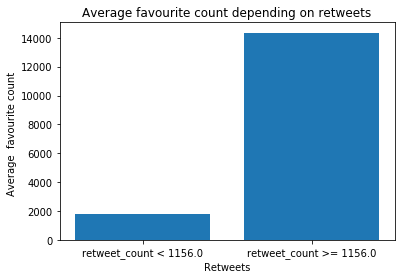

In [84]:
locations = [1, 2]
heights = [mean_retweet_low, mean_retweet_high]
labels = ['retweet_count < {}'.format(median), 'retweet_count >= {}'.format(median)]
plt.bar(locations, heights, tick_label=labels)
plt.title('Average favourite count depending on retweets')
plt.xlabel('Retweets')
plt.ylabel('Average  favourite count ');

### Store

In [85]:
master_df.to_csv('master_df.csv')